In [109]:
%reset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy import stats
from scipy.stats import norm
import statsmodels.api as sm
from statsmodels.formula.api import ols

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


# Read in Pipeline csv

NIST Engineering Statistics Handbook: 

The Alaska pipeline data consists of in-field ultrasonic measurements of the depths of defects in the Alaska pipeline. The depth of the defects were then re-measured in the laboratory. 

The data were analyzed to calibrate the bias of the field measurements relative to the laboratory measurements. In this analysis, the field measurement is the response variable, and the laboratory measurement is the predictor variable.

https://www.itl.nist.gov/div898/handbook/pmd/section6/pmd623.htm

In [110]:
pipeline=pd.read_csv('Pipeline.csv')
pipeline

,Field_Defect_Size,Lab_Defect_Size,Batch,Lag1
0,18,20.2,1,38.0
1,38,56.0,1,15.0
2,15,12.5,1,20.0
3,20,21.2,1,18.0
4,18,15.5,1,36.0
...,...,...,...,...
102,30,32.6,6,22.0
103,22,19.8,6,56.0
104,56,58.8,6,15.0
105,15,12.9,6,45.0


# 6 Plot Summary

# Plot 1:  Create a scatterplot

<AxesSubplot:xlabel='Lab_Defect_Size', ylabel='Field_Defect_Size'>

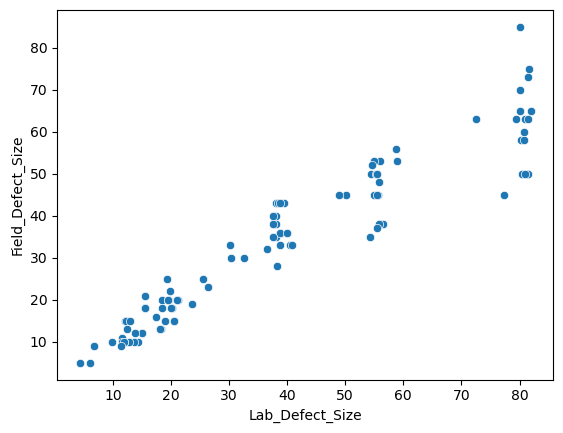

In [111]:
sns.scatterplot(x="Lab_Defect_Size",y="Field_Defect_Size",data=pipeline)

# Explore the data for Residual Plots

In [112]:
#fit the simple linear regression model
model1=ols('Field_Defect_Size ~ Lab_Defect_Size',data=pipeline)
results1=model1.fit()
print(results1.summary2())

                 Results: Ordinary least squares
Model:              OLS               Adj. R-squared:     0.893   
Dependent Variable: Field_Defect_Size AIC:                691.9374
Date:               2023-03-08 11:27  BIC:                697.2831
No. Observations:   107               Log-Likelihood:     -343.97 
Df Model:           1                 F-statistic:        886.7   
Df Residuals:       105               Prob (F-statistic): 5.20e-53
R-squared:          0.894             Scale:              36.978  
-------------------------------------------------------------------
                  Coef.   Std.Err.     t     P>|t|   [0.025  0.975]
-------------------------------------------------------------------
Intercept         4.9937    1.1257   4.4362  0.0000  2.7617  7.2257
Lab_Defect_Size   0.7311    0.0246  29.7781  0.0000  0.6824  0.7798
------------------------------------------------------------------
Omnibus:              4.669         Durbin-Watson:           1.860
Prob(Omn

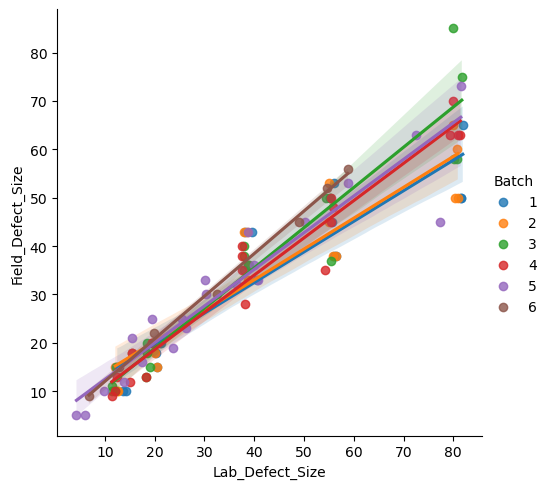

In [113]:
sns.lmplot(x="Lab_Defect_Size",y="Field_Defect_Size",hue="Batch",data=pipeline)

In [114]:
results1.resid

0     -1.762123
1     -7.935900
2      0.867432
3     -0.493234
4      1.674099
         ...   
102    1.172099
103    2.530321
104    8.016990
105    0.574987
106    4.181878
Length: 107, dtype: float64

# Plot 2:  Scatterplot of residuals versus independent variable

Text(0, 0.5, 'Residuals')

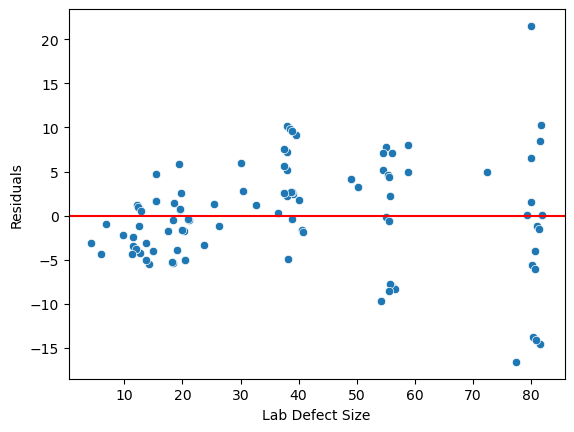

In [115]:
sns.scatterplot(x="Lab_Defect_Size",y=results1.resid,data=pipeline)
plt.axhline(0,color="red")
plt.xlabel("Lab Defect Size")
plt.ylabel("Residuals")

# Plot 3:  Scatterplot of residuals versus predcited values

In [116]:
results1.predict()

array([19.76212343, 45.93589951, 14.13256824, 20.49323449, 16.32590143,
       33.50701143, 20.34701228, 32.92212258, 45.64345509, 64.87167607,
       33.87256696, 46.22834394, 34.60367802, 15.44856815, 64.57923164,
       15.00990151, 64.57923164, 19.98145675, 45.93589951, 63.99434279,
       19.61590121, 46.30145504, 13.84012381, 19.32345679, 16.32590143,
       33.36078921, 19.25034568, 32.77590036, 45.20478845, 63.48256505,
       33.1414559 , 45.7896773 , 33.36078921, 14.13256824, 63.77500947,
       14.27879045, 64.140565  , 19.98145675, 45.20478845, 18.88479015,
       45.57034398, 13.98634602, 18.44612351, 13.40145717, 32.77590036,
       18.51923462, 32.77590036, 45.42412177, 33.28767811, 44.83923292,
       32.77590036, 13.7670127 , 64.72545385, 13.40145717, 63.48256505,
       18.37301241, 45.42412177, 63.62878726, 63.99434279, 45.7896773 ,
       15.96034589, 64.21367611, 13.7670127 , 64.50612053, 14.13256824,
       32.92212258, 44.6198996 , 62.9707873 , 18.2999013 , 45.57

In [117]:
# first x datapoint with predicted value
20.2*0.7311+4.9937

19.76192

Text(0, 0.5, 'Residuals')

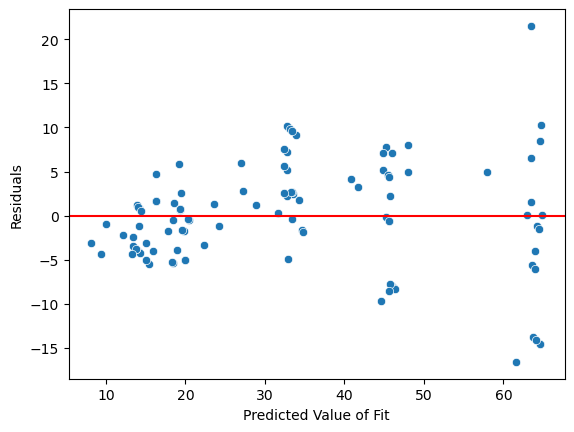

In [118]:
sns.scatterplot(x=results1.predict(),y=results1.resid,data=pipeline)
plt.axhline(0,color="red")
plt.xlabel("Predicted Value of Fit")
plt.ylabel("Residuals")

# Plot 4:  Time order plot

C:\Users\carol\AppData\Local\Temp\ipykernel_6268\1906410245.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.lineplot(x="Field_Defect_Size",y=pipeline.index,data=pipeline,ci=False)


Text(0.5, 0, 'Order')

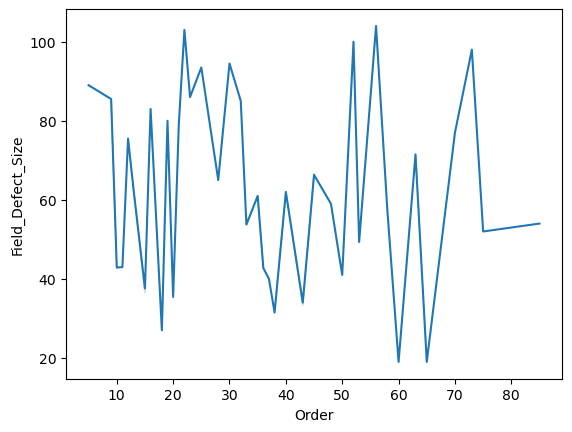

In [119]:
sns.lineplot(x="Field_Defect_Size",y=pipeline.index,data=pipeline,ci=False)
plt.ylabel("Field_Defect_Size")
plt.xlabel("Order")

Lag plot of residuals (Lag1) to determine independence of errors 

In [120]:
model2=ols('Lag1 ~ Lab_Defect_Size',data=pipeline)
results2=model2.fit()
print(results2.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.039   
Dependent Variable: Lag1             AIC:                918.5470
Date:               2023-03-08 11:27 BIC:                923.8739
No. Observations:   106              Log-Likelihood:     -457.27 
Df Model:           1                F-statistic:        5.300   
Df Residuals:       104              Prob (F-statistic): 0.0233  
R-squared:          0.048            Scale:              333.28  
-----------------------------------------------------------------
                   Coef.  Std.Err.    t    P>|t|   [0.025  0.975]
-----------------------------------------------------------------
Intercept         40.3505   3.3799 11.9385 0.0000 33.6481 47.0529
Lab_Defect_Size   -0.1698   0.0738 -2.3021 0.0233 -0.3161 -0.0235
-----------------------------------------------------------------
Omnibus:              7.820        Durbin-Watson:           1.912
Prob(Omnibus):        0.020

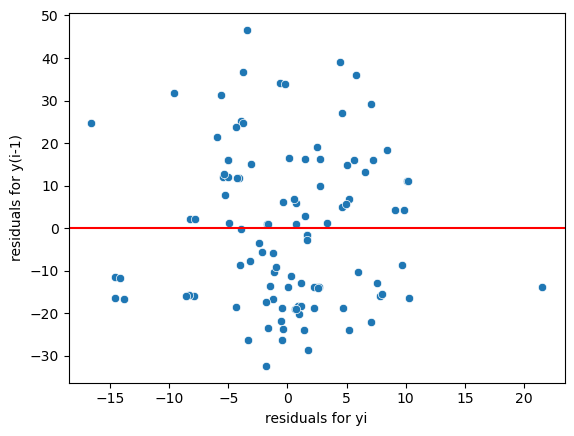

In [121]:
sns.scatterplot(x=results1.resid,y=results2.resid,data=pipeline)
plt.ylabel("residuals for y(i-1)")
plt.xlabel("residuals for yi")
plt.axhline(0,color="red")

# Plot 5:  Histogram of residuals

<AxesSubplot:ylabel='Density'>

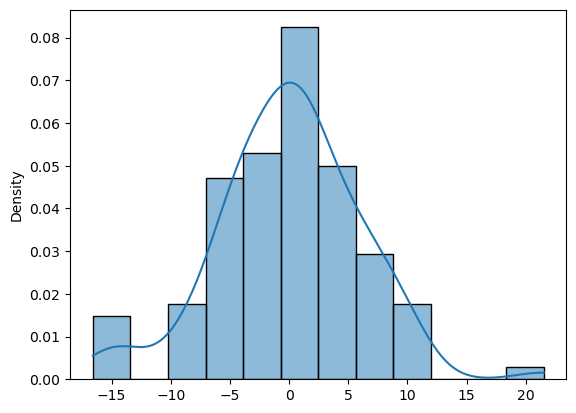

In [124]:
# normal in appearance
sns.histplot(x=results1.resid, stat='density',kde=True)

# Plot 6: QQ plot: Normal probability plot of the residuals

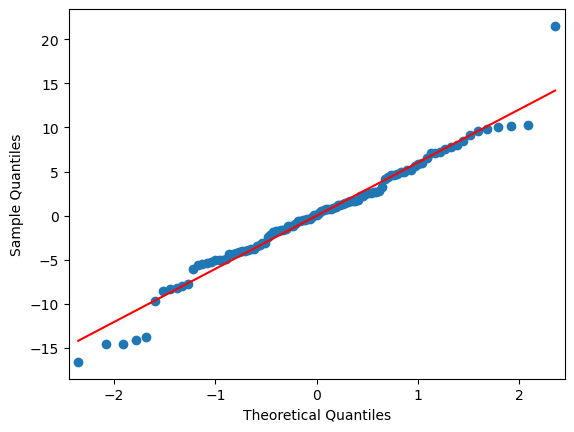

In [59]:
sm.qqplot(results1.resid,line='s')
plt.show()

# Outlier investigation

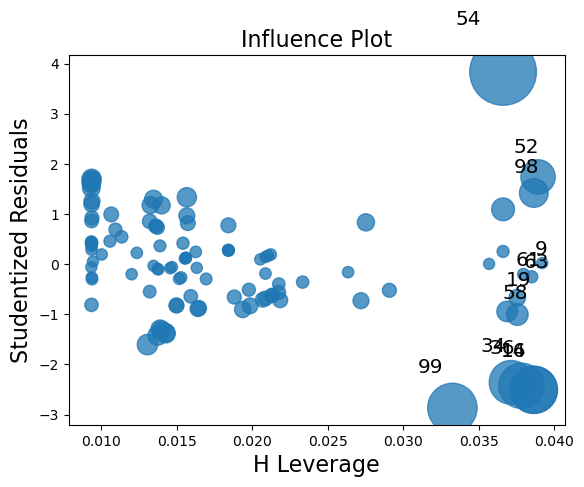

In [125]:
fig=sm.graphics.influence_plot(results1,criterion='cooks')

#  Transformation

What is the main problem for the model?

The first step is to try transforming the response variable to find a tranformation that will equalize the variances. In practice, the square root, ln, and reciprocal transformations often work well for this purpose. We will try these first.

In [ ]:
sns.scatterplot(x="Lab_Defect_Size",y="Field_Defect_Size",data=pipeline)

<AxesSubplot:xlabel='Lab_Defect_Size', ylabel='Field_Defect_Size'>

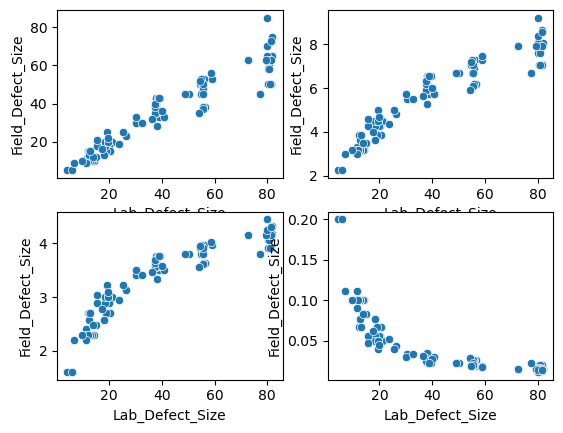

In [136]:
figure, axis = plt.subplots(nrows=2, ncols=2)
sns.scatterplot(x="Lab_Defect_Size",y="Field_Defect_Size",data=pipeline,ax=axis[0,0])
sns.scatterplot(x="Lab_Defect_Size",y=np.sqrt(pipeline["Field_Defect_Size"]),data=pipeline,ax=axis[0,1])
sns.scatterplot(x="Lab_Defect_Size",y=np.log(pipeline["Field_Defect_Size"]),data=pipeline,ax=axis[1,0])
sns.scatterplot(x="Lab_Defect_Size",y=1/(pipeline["Field_Defect_Size"]),data=pipeline,ax=axis[1,1])

One problem with applying the above transformation is that the plot indicates that a straight-line fit will no longer be an adequate model for the data. We address this problem by attempting to find a transformation of the predictor variable that will result in the most linear fit. In practice, the square root, ln, and reciprocal transformations often work well for this purpose. We will try these first.

<AxesSubplot:xlabel='Lab_Defect_Size', ylabel='Field_Defect_Size'>

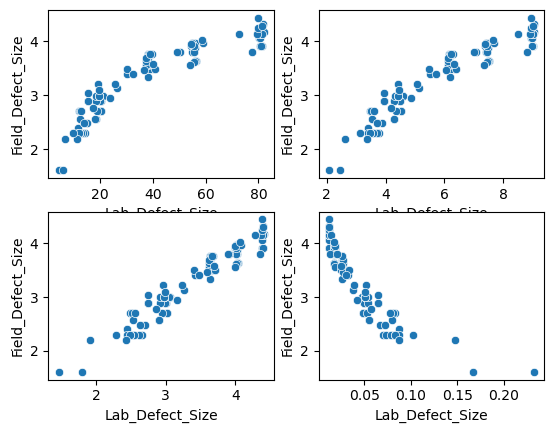

In [146]:
figure1, axis1 = plt.subplots(nrows=2, ncols=2)
sns.scatterplot(x="Lab_Defect_Size",y=np.log(pipeline["Field_Defect_Size"]),data=pipeline,ax=axis1[0,0])
sns.scatterplot(x=np.sqrt(pipeline["Lab_Defect_Size"]),y=np.log(pipeline["Field_Defect_Size"]),ax=axis1[0,1])
sns.scatterplot(x=np.log(pipeline["Lab_Defect_Size"]),y=np.log(pipeline["Field_Defect_Size"]),ax=axis1[1,0])
sns.scatterplot(x=1/(pipeline["Lab_Defect_Size"]),y=np.log(pipeline["Field_Defect_Size"]),ax=axis1[1,1])

This plot shows that the ln transformation of the predictor variable is a good candidate model.  Choose to fit a ln-ln model.

# Fit the transformed model

In [167]:
model3=ols('np.log(Field_Defect_Size) ~ np.log(Lab_Defect_Size)',data=pipeline)
results3=model3.fit()
print(results3.summary2())

                     Results: Ordinary least squares
Model:              OLS                       Adj. R-squared:     0.933   
Dependent Variable: np.log(Field_Defect_Size) AIC:                -75.7659
Date:               2023-03-08 12:13          BIC:                -70.4203
No. Observations:   107                       Log-Likelihood:     39.883  
Df Model:           1                         F-statistic:        1479.   
Df Residuals:       105                       Prob (F-statistic): 1.07e-63
R-squared:          0.934                     Scale:              0.028312
---------------------------------------------------------------------------
                          Coef.   Std.Err.     t     P>|t|   [0.025  0.975]
---------------------------------------------------------------------------
Intercept                 0.2814    0.0809   3.4769  0.0007  0.1209  0.4419
np.log(Lab_Defect_Size)   0.8852    0.0230  38.4572  0.0000  0.8395  0.9308
------------------------------------------

<AxesSubplot:xlabel='Lab_Defect_Size', ylabel='Field_Defect_Size'>

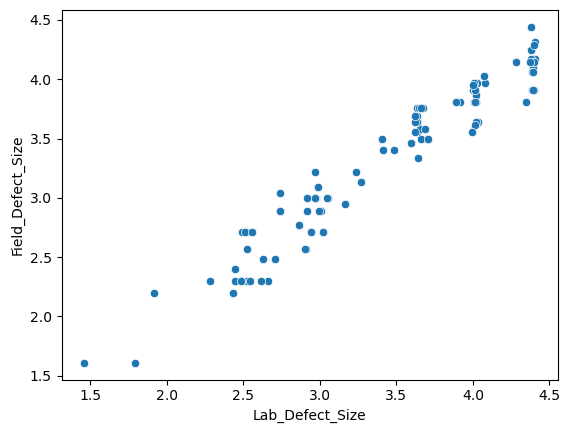

In [165]:
sns.scatterplot(x=np.log(pipeline["Lab_Defect_Size"]),y=np.log(pipeline["Field_Defect_Size"]))

Since we transformed the data, we need to check that all of the regression assumptions are now valid.

The 6-plot of the residuals indicates that all of the regression assumptions are now satisfied.

In [ ]:
model4=ols('np.log(Field_Defect_Size) ~ np.log(Lab_Defect_Size)',data=pipeline)
results4=model4.fit()
print(results4.summary2())

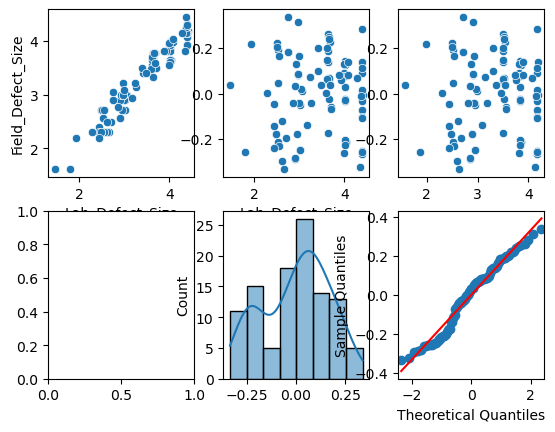

In [166]:
figure2, axis2 = plt.subplots(nrows=2, ncols=3)
sns.scatterplot(x=np.log(pipeline["Lab_Defect_Size"]),y=np.log(pipeline["Field_Defect_Size"]),data=pipeline,ax=axis2[0,0])
sns.scatterplot(x=np.log(pipeline["Lab_Defect_Size"]),y=results3.resid,data=pipeline,ax=axis2[0,1])
sns.scatterplot(x=results3.predict(),y=results3.resid,data=pipeline,ax=axis2[0,2])
#sns.scatterplot(x=results4.resid,y=results3.resid,ax=axis2[1,0])
sns.histplot(x=results3.resid, stat='count',kde=True,ax=axis2[1,1])
sm.qqplot(results3.resid,line='s',ax=axis2[1,2])
plt.show()